# Segmenting 3D image of a fossil

Here we look at Fossil Data from the documentary shown [here](https://vimeo.com/208535479) password is qbi2017 

An interactive video example [Video Instructions](http://people.ee.ethz.ch/~maderk/videos/DoesMyFossilHaveTeeth.swf)

The steps are to

- Load the data
- Display each slice in every direction
- Show a 3D isosurface plot

In [2]:
import numpy as np # linear algebra
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

In [3]:
fossil_path = '../input/Gut-PhilElvCropped.tif'
fossil_data = imread(fossil_path)
fossil_data = np.mean(fossil_data,axis=3)

print('Loading Fossil Data sized {}'.format(fossil_data.shape))

Loading Fossil Data sized (250, 296, 349)


Text(0.5, 1.0, 'Slice Histogram')

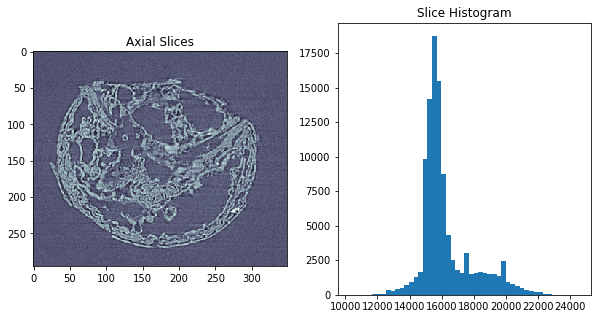

In [20]:
%matplotlib inline
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 50)
ax2.set_title('Slice Histogram')

# Filtering
Here we use a simple filter to clean up the data, a better one would preserve features

In [5]:
%matplotlib inline
from scipy.ndimage.filters import median_filter
# filter the data
filter_fossil_data = median_filter(fossil_data, (3,3,3))

10240.0 24576.0


Text(0.5, 1.0, 'Filtered Slice')

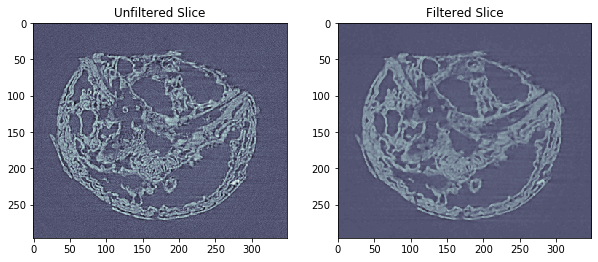

In [6]:
# setup the plot
slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]
# setup the default image arguments
im_args = dict(cmap = 'bone', vmin = 10000, vmax = 25000)

print(test_slice.min(), test_slice.max())
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.imshow(test_slice, **im_args)

ax1.set_title('Unfiltered Slice')

_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtered Slice')

# Showing Various Slices
Here we show the axial, saggital and coronal slices through the 3D Volume

(-0.5, 2367.5, 1999.5, -0.5)

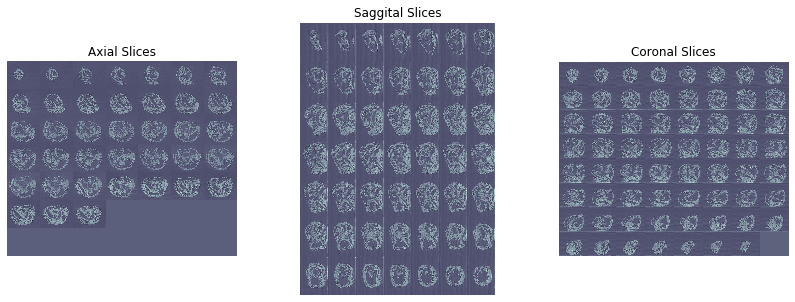

In [7]:
%matplotlib inline
skip_border = 50
skip_middle = 4
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Saggital Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Coronal Slices')
ax3.axis('off')

# Apply Threshold
Here we apply a threshold to the data

Text(0.5, 1.0, 'Slice with Threshold')

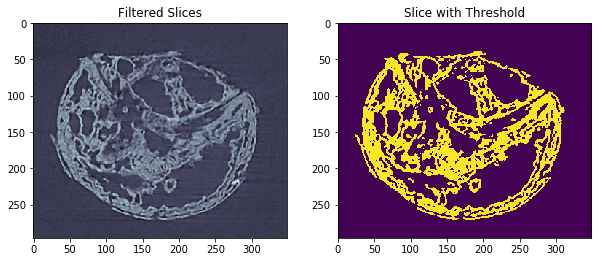

In [8]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
thresh_fossil_data = filter_fossil_data > 17000
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(thresh_slice)
ax2.set_title('Slice with Threshold')

# Morphology
Here we apply a closing operation to connect the nearby components

Text(0.5, 1.0, 'Slice After Closing')

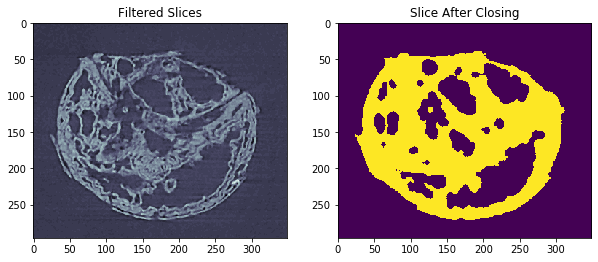

In [9]:
%matplotlib inline
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(5))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(close_slice)
ax2.set_title('Slice After Closing')

In [10]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces, _, _ = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

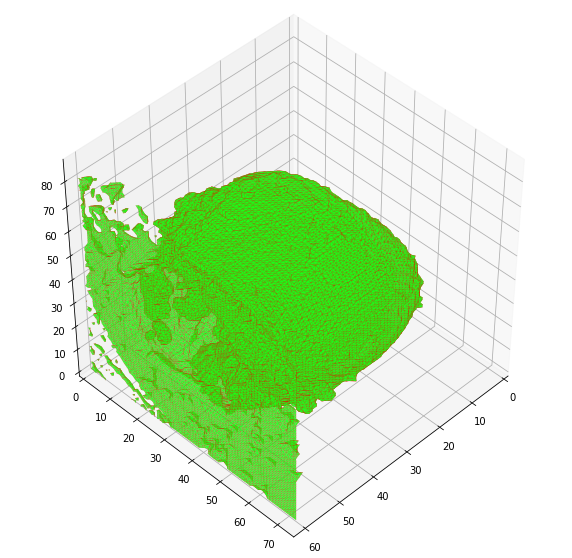

In [11]:
from scipy.ndimage import zoom
# we downsample the image to make 3d rendering quicker
fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
# now we display it with a nice mesh
_ = show_3d_mesh(fossil_downscale, 0.5)

# Tasks

 1. Adjust the threshold and angles to try and see the gut structure better
 2. Improve the filters by using more advanced techniques and windows (bonus for non-local means)
 3. Apply the same analysis to the teeth fossil data (teeth_fossil.tif)
 4. Show the inside of the fossil and try to visualize different structures there

# Fun Bonus
You can use ipyvolume to interactively view the volume in the browser (a lower resolution version). 

You may have to install the package:
```conda install -c conda-forge ipyvolume```

In [17]:
import ipyvolume as p3
p3.volshow(fossil_downscale/100)

Volume(data=array([[[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00,  0.0000…